## 1) Problem Statement 
- Collectively brainstorm and develop innovative solutions to improve the lives of those affected by diabetes

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os

# Set the OpenBLAS environment variable
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


# Based from the datasets above and the imbalance being addressed two datasets can be used
 - Dataset: diabetes _ 012 _ health _ indicators dataset as a Binary Classification
 - Dataset: Diabetes 50-50 dataset as a Multiclass Binary Classification
 - Dataset: Diabetes_Prediction_Dataset also as  a Multiclass Binary Classification

#### Hence, we can try and pursue any of them separately to get which can be more appropriate and this will be determined by the metrics used and how the models will perform 

# 1) Load The Dataset: Diabetes_Prediction_Dataset

In [2]:
#load the dataset
diabetes_prediction_data = pd.read_csv(r"C:\Users\wanji\Desktop\african techgirl hackathon\Africantech-Hackathon\diabetes_prediction_dataset.csv")
diabetes_prediction_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# 2) Data Understanding:Understanding the data info in-depth

In [3]:
# Function to know the shape 
def check_dataset_shape(dataset):
    if isinstance(dataset, np.ndarray):
        print("Dataset shape:", dataset.shape)
    elif isinstance(dataset, pd.DataFrame):
        print("Dataset shape:", dataset.shape)
    else:
        print("Invalid dataset type. Please provide a NumPy array or a Pandas DataFrame.")
        
# Assuming you have a dataset named 'sales_data'
check_dataset_shape(diabetes_prediction_data)

Dataset shape: (100000, 9)


In [4]:
#Column and datatypes
# Function to know the info of the datasets
def create_dataset_info(dataset):
    if isinstance(dataset, pd.DataFrame):
        info = dataset.info()
        return info
    else:
        return "Invalid dataset type. Please provide a Pandas DataFrame."
#Dataset named 'diabetes_prediction_data'
dataset_info = create_dataset_info(diabetes_prediction_data)
# Dataset named 'diabetes_prediction_data'
dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Statistics of the dataset 
def create_dataset_describe(dataset):
    if isinstance(dataset, pd.DataFrame):
        info = dataset.describe()
        return info
    else:
        return "Invalid dataset type. Please provide a Pandas DataFrame."
#Dataset named 'diabetes_prediction_data'
dataset_info = create_dataset_describe(diabetes_prediction_data)
dataset_info

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# 3) Check for missing values 

In [6]:
diabetes_prediction_data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### 3i) Check for duplicated entries

In [7]:
# Check the number of duplicate rows in the DataFrame
num_duplicates = diabetes_prediction_data.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)


Number of Duplicate Rows: 3854


In [8]:
# Drop the duplicate rows from the DataFrame
diabetes_prediction_data_no_duplicates = diabetes_prediction_data.drop_duplicates()


In [9]:
#reset the index after dropping duplicates
diabetes_prediction_data_no_duplicates = diabetes_prediction_data_no_duplicates.reset_index(drop=True)


In [10]:
# Display the shape of the DataFrame after dropping duplicates
print("Shape of DataFrame after Dropping Duplicates:", diabetes_prediction_data_no_duplicates.shape)

Shape of DataFrame after Dropping Duplicates: (96146, 9)


# 4) Label Encoding

#### Define maping for each categorical variable 

In [11]:
# Define the mapping for each categorical variable
gender_mapping = {'Male': 0, 'Female': 1}
hypertension_mapping = {'No': 0, 'Yes': 1, 'Low': 0, 'High': 1}
heart_disease_mapping = {'No': 0, 'Yes': 1}
smoking_mapping = {'No Info': 0, 'Uncertain': 1, 'Current': 2, 'Never': 3}


In [12]:
# Create a new DataFrame to preserve the original data
encoded_data = diabetes_prediction_data.copy()

In [13]:

# Apply label encoding with the specified mapping
encoded_data['gender'] = encoded_data['gender'].map(gender_mapping)
encoded_data['hypertension'] = encoded_data['hypertension'].map(hypertension_mapping)
encoded_data['heart_Disease'] = encoded_data['heart_disease'].map(heart_disease_mapping)
encoded_data['smoking_history'] = encoded_data['smoking_history'].map(smoking_mapping)


# 5) EDA Analysis 

- We need to understand in-depth given the dataset and this will help us give a better understaning of the data,
 how we can show relationship maybe for example the age and the heart disease/ hypertension or also the bmi as well.
 
 - Also, a deeper understanding to this will help us further understand what can be the target variable" In this case Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes,and also identify the features that can be used, hence showing that all EDA should be in line to the target variable either to show a relationship or mlticollinearity.

#### i) Distribution of the target variable (Diabetes_Status) using a countplot to understand the class distribution and assess class imbalance.

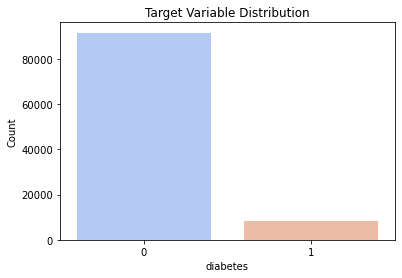

In [14]:
# Task 1: Visualize the distribution of the target variable (Diabetes_Status)
plt.figure(figsize=(6, 4))
sns.countplot(data=diabetes_prediction_data, x='diabetes', palette='coolwarm')
plt.title('Target Variable Distribution')
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.show()

#### ii) Calculate the proportion of positive and negative cases in the target variable

In [15]:
positive_cases = diabetes_prediction_data['diabetes'].sum()
negative_cases = len(diabetes_prediction_data) - positive_cases
proportion_positive = positive_cases / len(diabetes_prediction_data)
proportion_negative = negative_cases / len(diabetes_prediction_data)
print("Proportion of Positive Cases (diabetes = 1):", proportion_positive)
print("Proportion of Negative Cases (diabetes = 0):", proportion_negative)

Proportion of Positive Cases (diabetes = 1): 0.085
Proportion of Negative Cases (diabetes = 0): 0.915


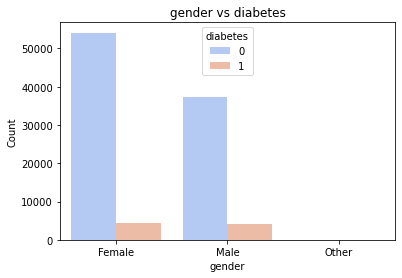

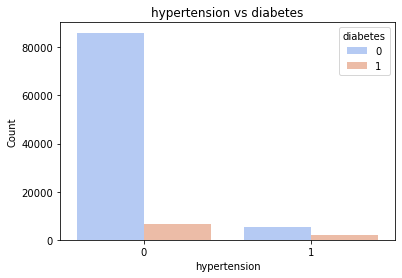

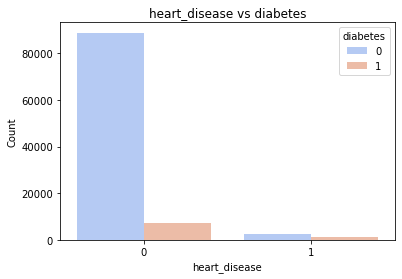

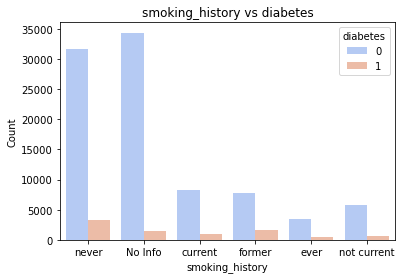

In [16]:
# Task 3: Plot the relationship between each categorical feature and the target variable using bar plots
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=diabetes_prediction_data, x=col, hue='diabetes', palette='coolwarm')
    plt.title(f'{col} vs diabetes')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### iii) Identify the numerical and categorical columns

##### - Numerical Columns: Univariate Analysis

In [17]:
#Identifying numerical columns
# Function to display all categorical columns
def print_numerical_columns(diabetes_prediction_data ):
    # Find categorical columns
    numerical_columns = diabetes_prediction_data.select_dtypes(include='object').columns

    # Print the column names
    for numerical_cols in numerical_columns:
        print(numerical_columns)

print_numerical_columns(diabetes_prediction_data)

Index(['gender', 'smoking_history'], dtype='object')
Index(['gender', 'smoking_history'], dtype='object')


In [18]:
def plot_numerical(diabetes_prediction_data):
    # Separate numerical and categorical columns
    numerical_columns = diabetes_prediction_data.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = diabetes_prediction_data.select_dtypes(include=['object']).columns
    
    # Plot numerical columns
    # Plot histograms for numerical columns
    for col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(diabetes_prediction_data[col], kde=True, color="#78a9ff")
        plt.title(f'Numerical Column: {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


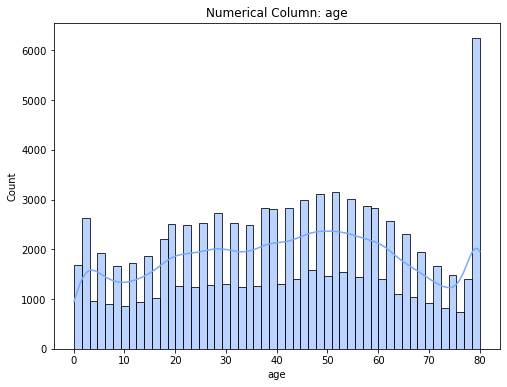

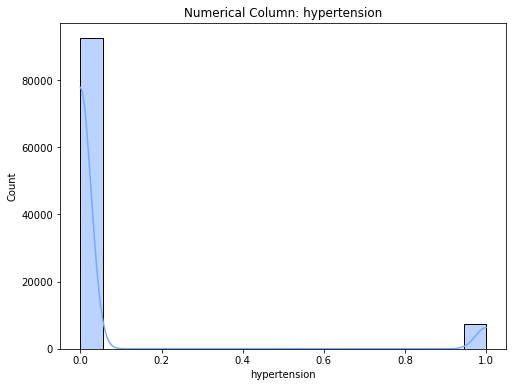

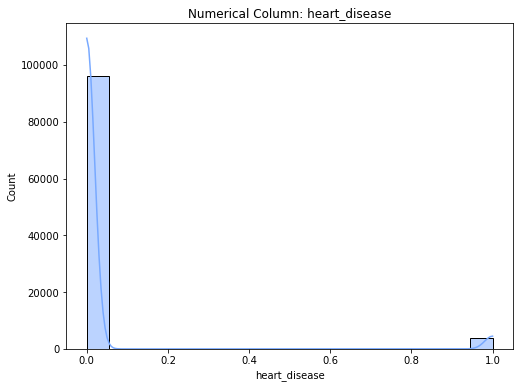

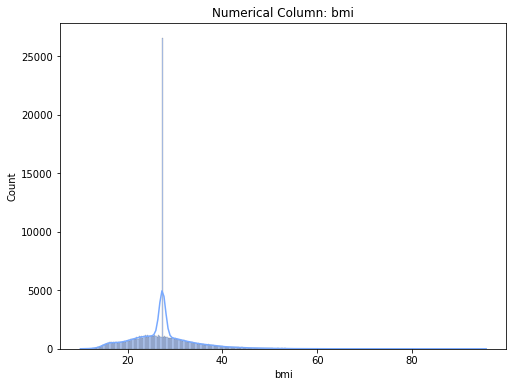

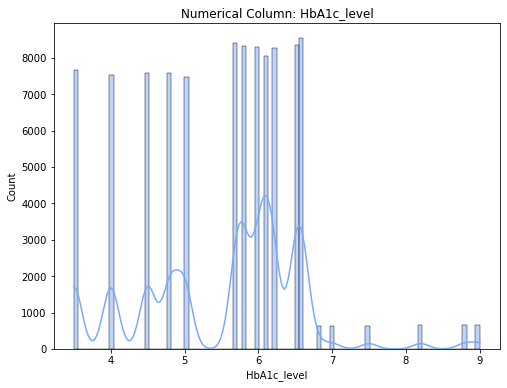

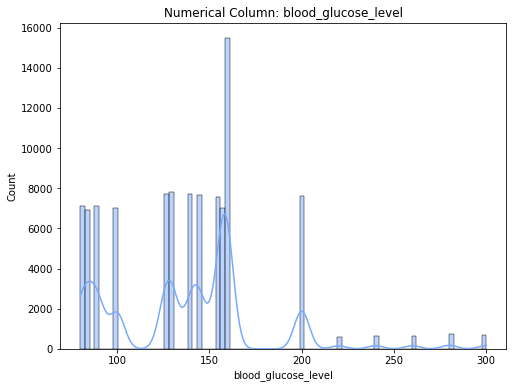

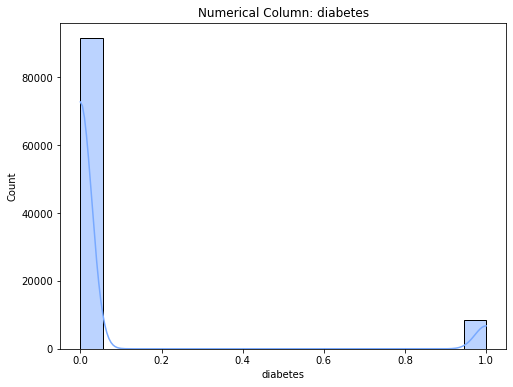

In [19]:
# Assuming you have a DataFrame called 'data'
plot_numerical(diabetes_prediction_data)

##### - Categorical Columns: Bivariate Analysis

In [20]:
# Function to display all categorical columns
def print_categorical_columns(diabetes_prediction_data ):
    # Find categorical columns
    categorical_columns = diabetes_prediction_data.select_dtypes(include='object').columns

    # Print the column names
    for column in categorical_columns:
        print(column)

print_categorical_columns(diabetes_prediction_data)

gender
smoking_history


In [21]:
def plot_numerical(diabetes_prediction_data):
    # Separate numerical and categorical columns
    numerical_columns = diabetes_prediction_data.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = diabetes_prediction_data.select_dtypes(include=['object']).columns
   # Plot barplots for categorical columns
    for col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=diabetes_prediction_data, palette='coolwarm')
        plt.title(f'Categorical Column: {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

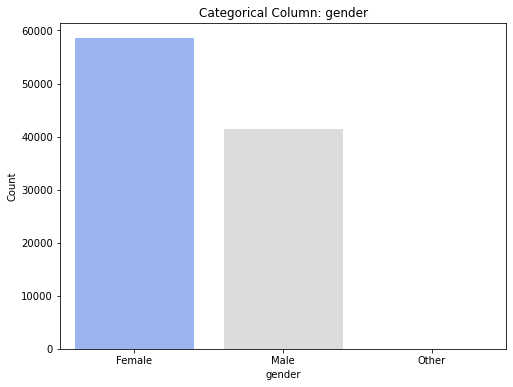

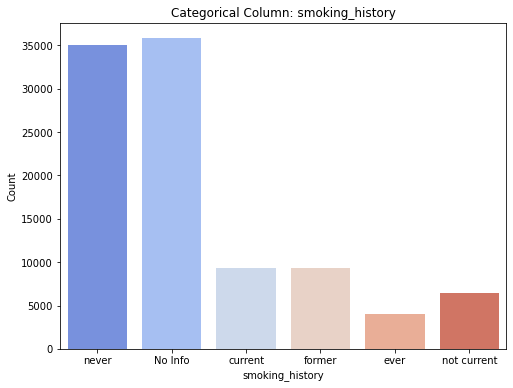

In [22]:
plot_numerical(diabetes_prediction_data)

###  iv)Multivariate Analaysis: Correlation matrix

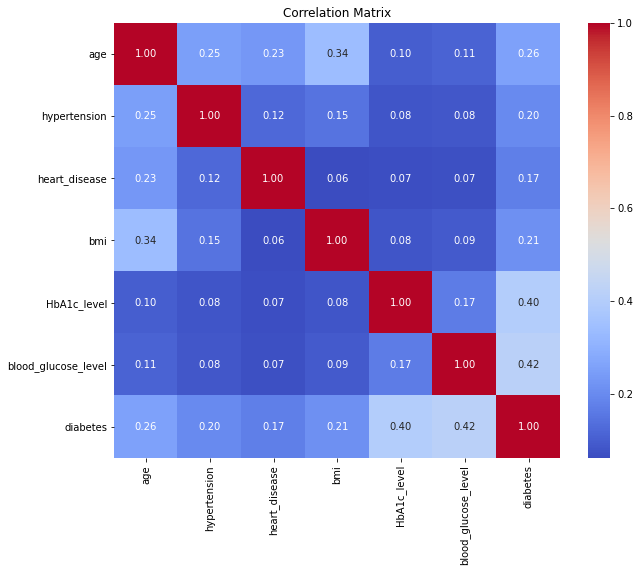

In [23]:
# Multivariate Analysis - Correlation Matrix
correlation_matrix = diabetes_prediction_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### v) Correlation with the Target 

In [24]:
# Correlation with Target - Correlation of each feature with Diabetes_Status
correlation_with_target = diabetes_prediction_data.corr()['diabetes'].abs().sort_values(ascending=False)
print("Correlation with Target:")
print(correlation_with_target)

Correlation with Target:
diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64


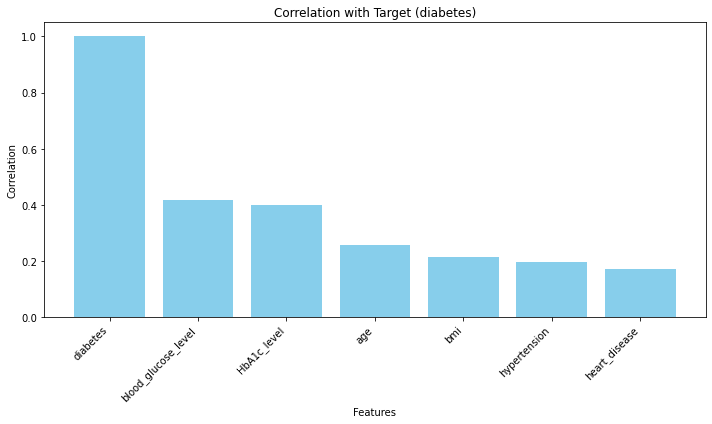

In [25]:
# Plot the correlation values
plt.figure(figsize=(10, 6))
plt.bar(correlation_with_target.index, correlation_with_target.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation with Target (diabetes)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

### 5.1)  Checking for significant features using Chi Test and Statistical Anova

In [26]:
# Separate features and target variable
X = diabetes_prediction_data.drop('diabetes', axis=1)
y = diabetes_prediction_data['diabetes']


In [27]:
# Chi-Square Test (Categorical Features)
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for feature in categorical_features:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}:")
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print()

Chi-Square Test for gender:
Chi-Square Statistic: 143.21825102550298
P-value: 7.953383718307458e-32

Chi-Square Test for hypertension:
Chi-Square Statistic: 3910.708546826595
P-value: 0.0

Chi-Square Test for heart_disease:
Chi-Square Statistic: 2945.847521829186
P-value: 0.0

Chi-Square Test for smoking_history:
Chi-Square Statistic: 1956.0944200848764
P-value: 0.0



- From the output above we can see that:
- Gender: The Chi-Square Statistic is 143.22, and the p-value is very close to zero (7.95e-32). This indicates that there is a significant association between gender and diabetes status.

- Hypertension: The Chi-Square Statistic is 3910.71, and the p-value is zero. This suggests a highly significant association between hypertension and diabetes status.

- Heart Disease: The Chi-Square Statistic is 2945.85, and the p-value is zero. There is a highly significant association between heart disease and diabetes status.

- Smoking History: The Chi-Square Statistic is 1956.09, and the p-value is zero. There is a highly significant association between smoking history and diabetes status.

In [28]:
# ANOVA (Numerical Features)
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numerical_features:
    groups = [X[feature][y == 0], X[feature][y == 1]]
    f_statistic, p = stats.f_oneway(*groups)
    print(f"ANOVA for {feature}:")
    print("F-statistic:", f_statistic)
    print("P-value:", p)
    print()

ANOVA for age:
F-statistic: 7131.405852125879
P-value: 0.0

ANOVA for bmi:
F-statistic: 4816.11393217536
P-value: 0.0

ANOVA for HbA1c_level:
F-statistic: 19122.21118387591
P-value: 0.0

ANOVA for blood_glucose_level:
F-statistic: 21363.05436142156
P-value: 0.0



* For the Anova results we can conclude that:
 - Age: The F-statistic is 7131.41, and the p-value is zero. This indicates that there is a significant difference in age between patients with and without diabetes.

- BMI: The F-statistic is 4816.11, and the p-value is zero. There is a significant difference in BMI between patients with and without diabetes.

- HbA1c Level: The F-statistic is 19122.21, and the p-value is zero. There is a significant difference in HbA1c level between patients with and without diabetes.

- Blood Glucose Level: The F-statistic is 21363.05, and the p-value is zero. There is a significant difference in blood glucose level between patients with and without diabetes.

#### Statistically print the Anova and Chi square features that will be used for modelling 

In [29]:
# Create empty lists to store feature names and p-values
chi_square_features = []
anova_features = []

# Chi-Square Test (Categorical Features)
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
for feature in categorical_features:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi_square_features.append((feature, p))

# ANOVA (Numerical Features)
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numerical_features:
    groups = [X[feature][y == 0], X[feature][y == 1]]
    f_statistic, p = stats.f_oneway(*groups)
    anova_features.append((feature, p))

# Sort the lists based on p-values in ascending order
chi_square_features.sort(key=lambda x: x[1])
anova_features.sort(key=lambda x: x[1])

# Print the features in order of significance
print("Chi-Square Test Results:")
for feature, p_value in chi_square_features:
    print(f"{feature}: p-value = {p_value}")

print("\nANOVA Results:")
for feature, p_value in anova_features:
    print(f"{feature}: p-value = {p_value}")


Chi-Square Test Results:
hypertension: p-value = 0.0
heart_disease: p-value = 0.0
smoking_history: p-value = 0.0
gender: p-value = 7.953383718307458e-32

ANOVA Results:
age: p-value = 0.0
bmi: p-value = 0.0
HbA1c_level: p-value = 0.0
blood_glucose_level: p-value = 0.0


### Visualize how the features are related to the target variable 

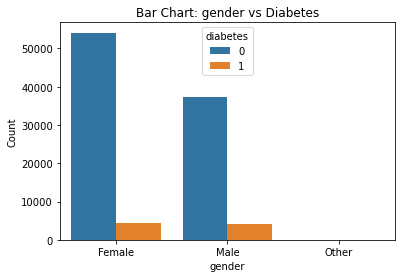

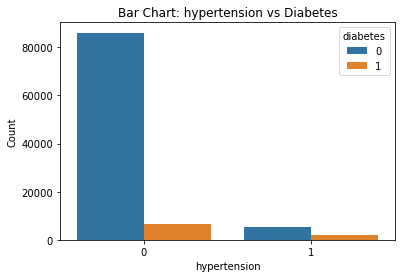

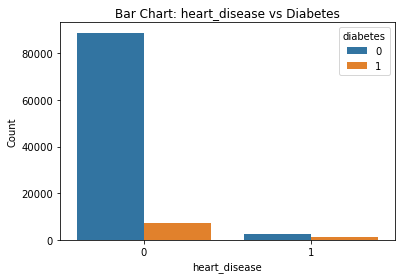

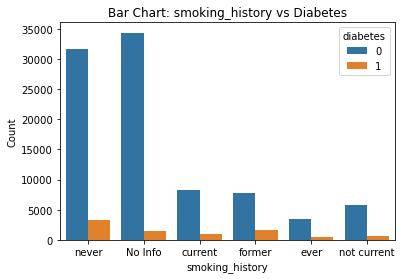

In [30]:

# Plot bar charts for categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='diabetes', data=pd.concat([X[feature], y], axis=1))
    plt.title(f'Bar Chart: {feature} vs Diabetes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


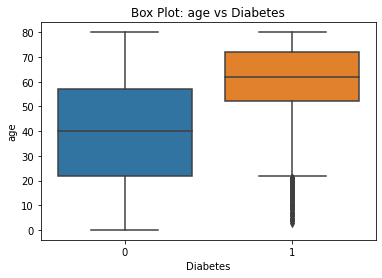

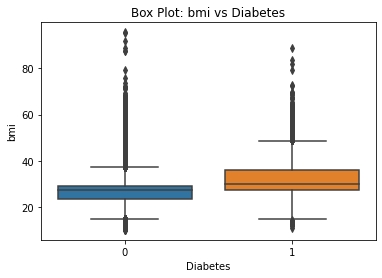

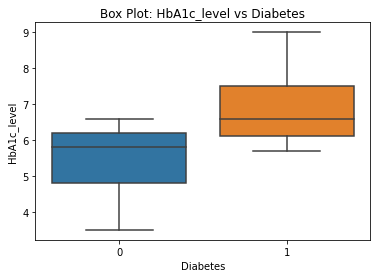

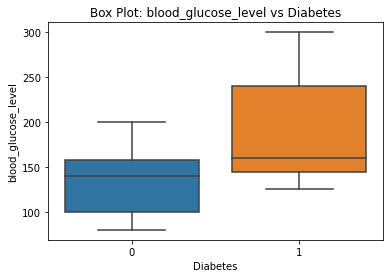

In [31]:
# Plot box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diabetes', y=feature, data=pd.concat([X[feature], y], axis=1))
    plt.title(f'Box Plot: {feature} vs Diabetes')
    plt.xlabel('Diabetes')
    plt.ylabel(feature)
    plt.show()


#### Data Scaling:
 * For data scaling, we will use the StandardScaler from scikit-learn to scale numerical features to a similar range.

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Selected features from ANOVA and Chi-Square tests (assuming you have them in a list)
selected_features = ['gender', 'hypertension', 'age', 'bmi', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']

# Subsetting the dataset to include only the selected features
X_selected = X[selected_features]

# Separate categorical and numerical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create ColumnTransformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep numerical features as they are
)

# Perform train-test split on the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=42, test_size=.25)

# Apply preprocessing to both training and testing data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the numerical features in X_train and X_test
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)


In [33]:
X_train.columns

Index(['gender', 'hypertension', 'age', 'bmi', 'heart_disease',
       'smoking_history', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')

In [34]:
len(X_train.columns)

8

# 6) Modelling

### Logistic Regression Model as the baseline model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Instantiate oversampled model
print('Original dataset shape {}'.format(Counter(y_train)))
ros = RandomOverSampler(random_state=42)

# Fit the sample and apply the new training data to the model
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)
print('New dataset shape {}'.format(Counter(y_train_resampled)))

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the resampled training data
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Baseline Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Original dataset shape Counter({0: 68650, 1: 6350})
New dataset shape Counter({0: 68650, 1: 68650})


Logistic Regression Baseline Model Performance:
Accuracy: 0.88856
Precision: 0.4280217292892712
Recall: 0.8795348837209302
F1-score: 0.5758221680876979


* We can conclude that:
- The precision of the model is 42.80%, which means that when it predicts a positive sample (Class 1), it is correct 42.80% of the time. T
- he recall (true positive rate) is 87.95%, indicating that the model is identifying 87.95% of the actual positive samples in the test set. 
- The F1-score, which is the harmonic mean of precision and recall, is 57.58%. The F1-score considers both precision and recall and provides a balance between the two metrics


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

# Assuming you have already defined the selected_features, X, and y
selected_features = ['gender', 'hypertension', 'age', 'bmi', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']
X_selected = X[selected_features]

# Separate categorical and numerical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create ColumnTransformer for one-hot encoding categorical features and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep other features as they are
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=42, test_size=0.25)

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Create the pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', ros),
    ('logreg', logreg_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Model Performance after Random Over-sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Logistic Regression Model Performance after Random Over-sampling:
Accuracy: 0.88856
Precision: 0.4280217292892712
Recall: 0.8795348837209302
F1-score: 0.5758221680876979


## XGBoost Modelling

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

# Assuming you have already defined the selected_features, X, and y
selected_features = ['gender', 'hypertension', 'age', 'bmi', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']
X_selected = X[selected_features]

# Separate categorical and numerical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create ColumnTransformer for one-hot encoding categorical features and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep other features as they are
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=42, test_size=0.25)

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Create an XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)

# Create the pipeline with preprocessing and XGBoost Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', ros),
    ('xgb', xgb_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("XGBoost Model Performance after Random Over-sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


XGBoost Model Performance after Random Over-sampling:
Accuracy: 0.92312
Precision: 0.5321670428893905
Recall: 0.8772093023255814
F1-score: 0.662451703547594


### Fine tuning for XGBoost Model 

XGBoost Model Performance:
Accuracy: 0.90244
Precision: 0.4659759830468566
Recall: 0.9204651162790698
F1-score: 0.618727528528998


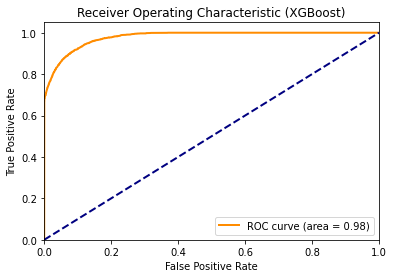

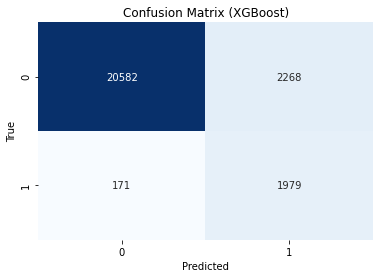

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the final XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
best_xgb_model.fit(X_train_resampled, y_train_resampled)


# Get predicted probabilities for XGBoost model
y_pred_prob_xgb = best_xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)


# Make predictions on the test set for each model
y_pred_xgb = best_xgb_model.predict(X_test_scaled)


# Calculate accuracy, precision, recall, and F1-score for each model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
# Print the evaluation metrics for each model
print("XGBoost Model Performance:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)

# Plot ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix for XGBoost
y_pred_xgb = best_xgb_model.predict(X_test_scaled)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (XGBoost)')
plt.show()



## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline

# Assuming you have already defined the selected_features, X, and y
selected_features = ['gender', 'hypertension', 'age', 'bmi', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']
X_selected = X[selected_features]

# Separate categorical and numerical features
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create ColumnTransformer for one-hot encoding categorical features and scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep other features as they are
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=42, test_size=0.25)

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create a pipeline for Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', ros),
    ('dt', dt_model)
])

# Fit and evaluate Decision Tree model using the pipeline
dt_pipeline.fit(X_train, y_train)
y_pred = dt_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Decision Tree Classifier Performance after Random Over-sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Decision Tree Classifier Performance after Random Over-sampling:
Accuracy: 0.95368
Precision: 0.7300556586270872
Recall: 0.7320930232558139
F1-score: 0.7310729215048768


### Fine tuning for the decision tree


Decision Tree Classifier Performance:
Accuracy: 0.97116
Precision: 1.0
Recall: 0.6646511627906977
F1-score: 0.7985470801899972


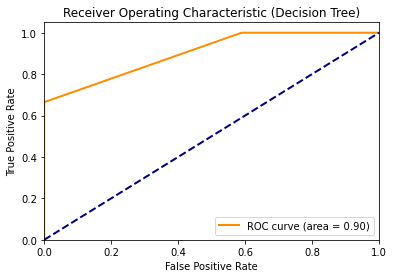

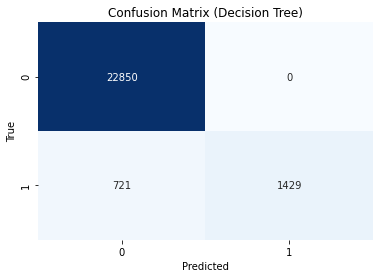

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code for Random Over-sampling and fine-tuning)

# Create and train the final Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
best_dt_model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for Decision Tree model
y_pred_prob_dt = best_dt_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

#Make predictions on the test set for each model
y_pred_dt = best_dt_model.predict(X_test_scaled)

#Calculate accuracy, precision, recall, and F1-score for each model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the evaluation metrics for each model
print("\nDecision Tree Classifier Performance:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

# Plot ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix for Decision Tree
y_pred_dt = best_dt_model.predict(X_test_scaled)
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


## Random Forest 

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', ros),
    ('rf', rf_model)
])

# Fit and evaluate Random Forest model using the pipeline
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest Classifier Performance after Random Over-sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Random Forest Classifier Performance after Random Over-sampling:
Accuracy: 0.96476
Precision: 0.8546674119619899
Recall: 0.7111627906976744
F1-score: 0.7763391723787764


## Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
# Create Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Create a pipeline for Gradient Boosting
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', ros),
    ('gb', gb_model)
])

# Fit and evaluate Gradient Boosting model using the pipeline
gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Gradient Boosting Classifier Performance after Random Over-sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Gradient Boosting Classifier Performance after Random Over-sampling:
Accuracy: 0.90636
Precision: 0.47705981263511893
Recall: 0.9237209302325582
F1-score: 0.6291778869000476


### Fine Tuning with Gradient Boosting


Gradient Boosting Classifier Performance:
Accuracy: 0.90636
Precision: 0.47705981263511893
Recall: 0.9237209302325582
F1-score: 0.6291778869000476


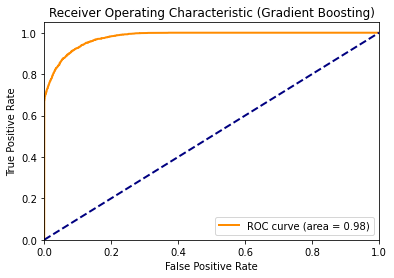

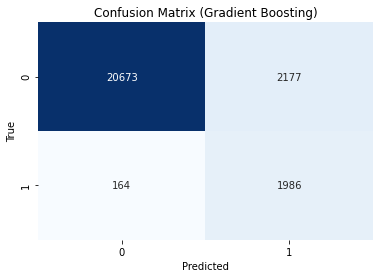

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code for Random Over-sampling and fine-tuning)

# Create and train the final Gradient Boosting model with the best hyperparameters
best_gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
best_gb_model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for Gradient Boosting model
y_pred_prob_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)

# Make predictions on the test set for each model
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1-score for each model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Print the evaluation metrics for each model
print("\nGradient Boosting Classifier Performance:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1-score:", f1_gb)


# Plot ROC curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_prob_gb)
plt.figure()
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix for Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test_scaled)
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()


## Neural Network 

In [44]:
from sklearn.neural_network import MLPClassifier

# Create Neural Network model
nn_model = MLPClassifier(random_state=42)

# Create a pipeline for Neural Network
nn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', ros),
    ('nn', nn_model)
])

# Fit and evaluate Neural Network model using the pipeline
nn_pipeline.fit(X_train, y_train)
y_pred = nn_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Neural Network Classifier Performance after Random Over-sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Neural Network Classifier Performance after Random Over-sampling:
Accuracy: 0.91296
Precision: 0.49658434051497635
Recall: 0.8790697674418605
F1-score: 0.6346541302887845


### Fine Tuning for Neural Network


Neural Network Classifier Performance:
Accuracy: 0.90796
Precision: 0.4809005818365798
Recall: 0.8841860465116279
F1-score: 0.622972308700639


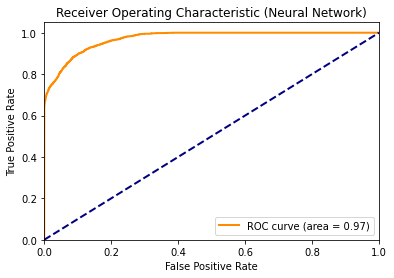

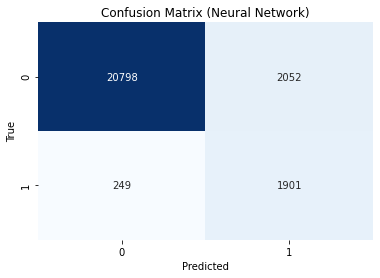

In [45]:
from sklearn.neural_network import MLPClassifier
# Create and train the final Neural Network model with the best hyperparameters
best_nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
best_nn_model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for Neural Network model
y_pred_prob_nn = best_nn_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

# Make predictions on the test set for each model
y_pred_nn = best_nn_model.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1-score for each model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Print the evaluation metrics for each model
print("\nNeural Network Classifier Performance:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-score:", f1_nn)
# Plot ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Neural Network)')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix for Neural Network
y_pred_nn = best_nn_model.predict(X_test_scaled)
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Neural Network)')
plt.show()

##  Support Vector Machine

In [46]:
from sklearn.svm import SVC
# Create SVM model
svm_model = SVC(random_state=42)

# Create a pipeline for SVM
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('oversampler', ros),
    ('svm', svm_model)
])

# Fit and evaluate SVM model using the pipeline
svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Support Vector Machine (SVM) Performance after Random Over-sampling:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Support Vector Machine (SVM) Performance after Random Over-sampling:
Accuracy: 0.8922
Precision: 0.43921481151014946
Recall: 0.9158139534883721
F1-score: 0.5936981757877281


## Best Model Performance 

## Deployment 

### Pickle the best model in this case    for deployment 

In [47]:
import pickle
import os

# Directory to save the models
save_directory = "C:/Users/wanji/Desktop/african techgirl hackathon/Africantech-Hackathon"

# Pickle and save the Gradient Boosting model
with open(os.path.join(save_directory, 'gradient_boost_model.pkl'), 'wb') as f:
    pickle.dump(best_gb_model, f)

# Pickle and save the SVM model
with open(os.path.join(save_directory, 'svm_model.pkl'), 'wb') as f:
    pickle.dump(svm_model, f)

# Pickle and save the Neural Network model
with open(os.path.join(save_directory, 'neural_network_model.pkl'), 'wb') as f:
    pickle.dump(best_nn_model, f)
